<a href="https://colab.research.google.com/github/SophiaHe/covid19_work/blob/master/Kalmar_Filter_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
#url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
death = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
recover = pd.read_csv(url, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "Unites States")
death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "Unites States")
recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "Unites States")

In [26]:
confirmed.loc[confirmed['Country/Region'] == 'Canada']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,4,4,4,4,4,4,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,9,12,13,21,21,27,32,32,39,46,64,64,73,103,103,186,231
92,Ontario,Canada,51.2538,-85.3232,0,0,0,0,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,6,6,11,15,18,20,20,22,25,28,29,34,36,41,42,74,79,104,177,185,221,257
93,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,7,7,19,19,29,29,39,56,74,97,119
94,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,3,4,4,4,8,9,17,17,24,50,74,94,121
201,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,6,8,11,11
406,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,7,8,15,17
407,Saskatchewan,Canada,52.9399,-106.4509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,7,7,8,16
411,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,8,9,9
433,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3
434,Prince Edward Island,Canada,46.5107,-63.4168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2


In [0]:
population=pd.read_csv('https://raw.githubusercontent.com/SophiaHe/COVID19/master/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

# merge region
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)

def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)


ts=create_ts(confirmed)
ts_d=create_ts(death)
ts_rec=create_ts(recover)

# Create data for R script
ts_r=ts.reset_index()
ts_r=ts_r.rename(columns = {'index':'date'})
ts_r['date']=pd.to_datetime(ts_r['date'] ,errors ='coerce')
ts_r.to_csv(r'ts_r.csv')

In [57]:
t=ts_d.head()
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']
print(temp)

           date           region  confirmed  Y    X   X2
0    2020-01-22  Afghanistan_nan          0  0  0.0  0.0
1    2020-01-23  Afghanistan_nan          0  0  0.0  0.0
2    2020-01-24  Afghanistan_nan          0  0  0.0  0.0
3    2020-01-25  Afghanistan_nan          0  0  0.0  0.0
4    2020-01-26  Afghanistan_nan          0  0  0.0  0.0
...         ...              ...        ... ..  ...  ...
2803 2020-01-23       Zambia_nan          0  0  0.0  0.0
2804 2020-01-24       Zambia_nan          0  0  0.0  0.0
2805 2020-01-25       Zambia_nan          0  0  0.0  0.0
2806 2020-01-26       Zambia_nan          0  0  0.0  0.0
2807 2020-01-27       Zambia_nan          0  0  0.0  0.0

[2808 rows x 6 columns]


In [0]:
p = pd.read_csv('pred_all.csv')

In [0]:
############ Merge R output due to package problem
t=ts_d
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

Update weather info

In [30]:
!pip install pyweatherbit

  Created wheel for pyweatherbit: filename=pyweatherbit-2.0.0-cp36-none-any.whl size=6676 sha256=afc2d94edeea4a6dcc9100f221252a038083e435b0db3b79f810470ffd159e20
  Stored in directory: /root/.cache/pip/wheels/d4/cb/bf/c00ca6550d58457b557cd1debb6a5c90c2880eee1c31da3b26
Successfully built pyweatherbit


In [0]:
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 
api_key = "26141d374d8e49d0a2e1f1254428ce8e"
#api_key ="f206579c74644c4b96a2423cb56a1687"
#api_key ="81a581ac823849f38427fb5081cb8df8"
#api_key ="be7aaf4ff7184347aa1ebc2a2db514fe"

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.
##api.get_forecast(lat=lat, lon=lon)

In [37]:
w=pd.DataFrame(columns=['date','region','min','max'])
for i in range (61,len(confirmed)):
  start_date=pd.to_datetime('2020-01-22')
  for j in range (4,confirmed.shape[1]-2):
    jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json
    j=json_normalize(j)
    j=j['data']
    max_temp=json_normalize(j['data'])['max_temp'].values[0] # max
    min_temp=json_normalize(j['data'])['min_temp'].values[0]
    try:
      w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
    except Exception:
      w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)
    start_date=start_date+ pd.DateOffset(days=1)

HTTPError: ignored

In [0]:
w=pd.read_csv('https://raw.githubusercontent.com/Rank23/COVID19/master/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')
#w['date']=pd.to_datetime(w['date'],errors ='coerce')

w_forecast=pd.read_csv('https://raw.githubusercontent.com/Rank23/COVID19/master/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [46]:
w.date.unique()

array(['2020-02-18T00:00:00.000000000', '2020-02-19T00:00:00.000000000',
       '2020-02-20T00:00:00.000000000', '2020-02-21T00:00:00.000000000',
       '2020-02-22T00:00:00.000000000', '2020-02-23T00:00:00.000000000',
       '2020-02-24T00:00:00.000000000', '2020-02-25T00:00:00.000000000',
       '2020-02-26T00:00:00.000000000', '2020-01-22T00:00:00.000000000',
       '2020-01-23T00:00:00.000000000', '2020-01-24T00:00:00.000000000',
       '2020-01-25T00:00:00.000000000', '2020-01-26T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-01-28T00:00:00.000000000',
       '2020-01-29T00:00:00.000000000', '2020-01-30T00:00:00.000000000',
       '2020-01-31T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2020-02-02T00:00:00.000000000', '2020-02-03T00:00:00.000000000',
       '2020-02-04T00:00:00.000000000', '2020-02-05T00:00:00.000000000',
       '2020-02-06T00:00:00.000000000', '2020-02-07T00:00:00.000000000',
       '2020-02-08T00:00:00.000000000', '2020-02-09

In [61]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is t.iloc[i-2,1]):
    t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
    t.iloc[i,6]=(t.iloc[i-1,2]/t.iloc[i-2,2]-1)*100
    t.iloc[i,9]=t.iloc[i-1,2]
  if(t.iloc[i,1] is t.iloc[i-4,1]):
    t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
    t.iloc[i,7]=(t.iloc[i-1,2]/t.iloc[i-4,2]-1)*100
  if(t.iloc[i,1] is t.iloc[i-8,1]):
    t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
    t.iloc[i,8]=(t.iloc[i-1,2]/t.iloc[i-8,2]-1)*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)
t['kalman_prediction']=round(t['kalman_prediction'])
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(1)
train['population']=train['population'].astype('int32')
train['infected_rate'] =train['last_day']/train['population']*10000
train=train.merge(w,how='left',on=['date','region'])
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
  if(np.isnan(train.iloc[i,13])):
    if(train.iloc[i,1] is train.iloc[i-1,1]):
      train.iloc[i,13]=train.iloc[i-1,13]
      train.iloc[i,14]=train.iloc[i-1,14]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in long_scalars


Kalman 1 day Prediction with Evaluation

            region           mse         rmse         mae
105  France_France  2.421142e+06  1556.001878  352.810345
                   region  confirmed  kalman_prediction
date                                                   
2020-01-22  France_France        0.0                0.0
2020-01-23  France_France        0.0                0.0
2020-01-24  France_France        2.0                0.0
2020-01-25  France_France        3.0                3.0
2020-01-26  France_France        3.0                4.0
2020-01-27  France_France        3.0                4.0
2020-01-28  France_France        4.0                4.0
2020-01-29  France_France        5.0                5.0
2020-01-30  France_France        5.0                6.0
2020-01-31  France_France        5.0                6.0
2020-02-01  France_France        6.0                6.0
2020-02-02  France_France        6.0                6.0
2020-02-03  France_France        6.0                7.0
2020-02-04  France_France        6.0        

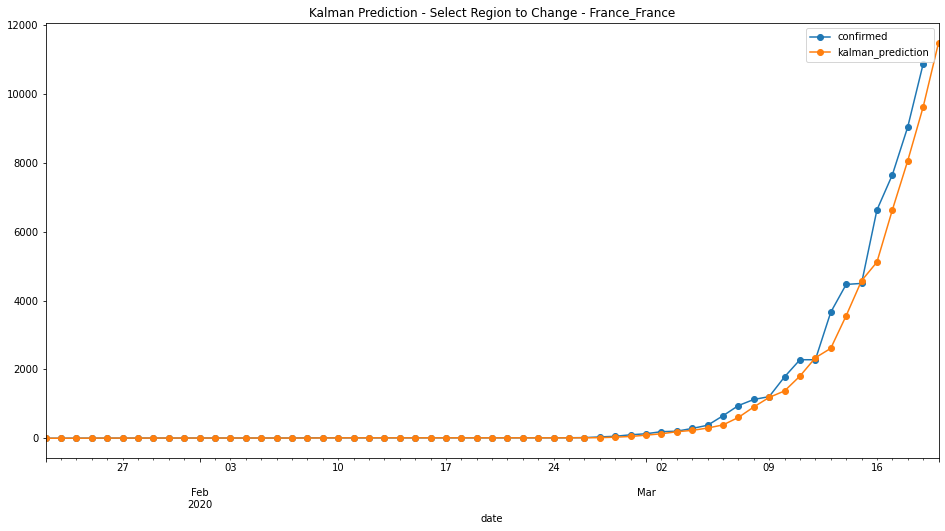

In [64]:
# Select region
region='France_France'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
# p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])
print(p)


            region          mse       rmse       mae
41  Canada_Ontario  1495.017241  38.665453  8.948276
                    region  confirmed  kalman_prediction
date                                                    
2020-01-22  Canada_Ontario        0.0                0.0
2020-01-23  Canada_Ontario        0.0                0.0
2020-01-24  Canada_Ontario        0.0                0.0
2020-01-25  Canada_Ontario        0.0                0.0
2020-01-26  Canada_Ontario        1.0                0.0
2020-01-27  Canada_Ontario        1.0                1.0
2020-01-28  Canada_Ontario        1.0                1.0
2020-01-29  Canada_Ontario        1.0                1.0
2020-01-30  Canada_Ontario        1.0                1.0
2020-01-31  Canada_Ontario        3.0                1.0
2020-02-01  Canada_Ontario        3.0                2.0
2020-02-02  Canada_Ontario        3.0                3.0
2020-02-03  Canada_Ontario        3.0                4.0
2020-02-04  Canada_Ontario        3.0  

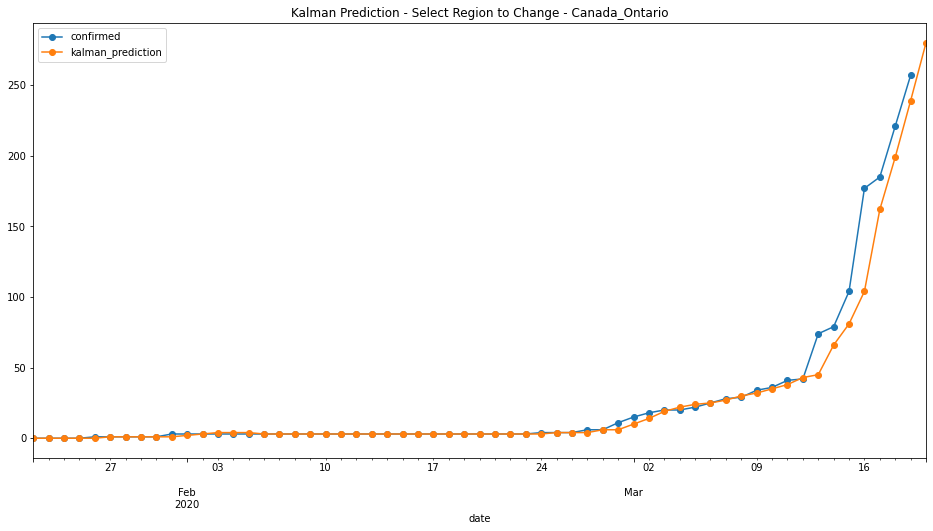

In [63]:

# Select region
region='Canada_Ontario'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
# p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])
print(p)